In [31]:
#导入数据
from sklearn import datasets
digit_dataset = datasets.load_digits()
X = digit_dataset.data[:200]
y = digit_dataset.target[:200]

In [32]:
import numpy as np
np.random.seed(0)
n_sample = len(y)
# X = np.c_[X,2*np.random.random((n_samples,200))]
X = np.hstack((X,2*np.random.random((n_samples,200))))

In [43]:
from sklearn import svm,feature_selection
transformer = feature_selection.SelectPercentile(feature_selection.f_classif)
clf = svm.SVC()
from sklearn.pipeline import Pipeline
featureselection_svc_pipeline = Pipeline([('featureselection',transformer),('svc',clf)])

c:\users\huashaojie\python36\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [ 0  7  8 15 16 23 24 31 32 39 40 47 48 56 63] are constant.
  UserWarning)
c:\users\huashaojie\python36\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\users\huashaojie\python36\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [ 0  8 15 16 23 31 32 39 40 48 56] are constant.
  UserWarning)
c:\users\huashaojie\python36\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\users\huashaojie\python36\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [ 0  8 15 16 23 31 32 39 40 48 56] are constant.
  UserWarning)
c:\users\huashaojie\python36\lib\site-packages\sklearn\feature_selection\u

c:\users\huashaojie\python36\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


<Container object of 3 artists>

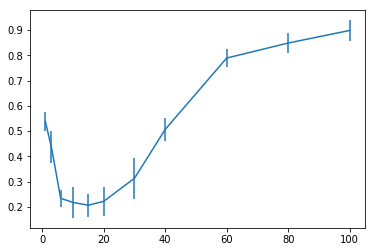

In [49]:
percentile_list = [1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100]
score_mean_list = []
score_std_list = []
for percentile in percentile_list:
    featureselection_svc_pipeline.set_params(featureselection__percentile = percentile)
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(featureselection_svc_pipeline,X,y,scoring = 'accuracy')
    score_mean_list.append(np.mean(scores))
    score_std_list.append(np.std(scores))
%matplotlib inline
import matplotlib.pyplot as plt
plt.errorbar(percentile_list,score_mean_list,score_std_list)